In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [50]:
def percentage_within_values(
        result_list: list, 
        min_val: int | float = 3, 
        max_val: int | float = 4
        ) -> float:
    df=pd.DataFrame(result_list, columns=['count_col'])
    within_values=df[(df['count_col']>=min_val) & (df['count_col'] <= max_val)]
    return len(within_values)/len(df)

def expand_deck_by_quantity(deck: pd.DataFrame):
    '''Expands the deck using the specified quantity such that each card will 
    appear individually with a quantity of 1.'''
    indeces_by_quantity=deck.index.repeat(deck['Quantity'])
    deck=deck.loc[indeces_by_quantity]
    deck['Quantity']=1
    deck.reset_index(inplace=True, drop=True)
    return deck

## Load deck

When exported from Archidekt, columns chosen should be: [Quantity, Name, Category, Color, Mana value] in that order. Out of deck cards should be excluded from this file

In [32]:
def load_deck(deck_name):
    full_deck=pd.read_csv(
        f'decks/{deck_name}', 
        names=['Quantity', 'Name', 'Category', 'Color', 'Mana']
        )
    deck=full_deck[full_deck['Category']!='Commander']

In [51]:
deck_name='felix_five_boots.csv'

full_deck=pd.read_csv(
    f'decks/{deck_name}', 
    names=['Quantity', 'Name', 'Category', 'Color', 'Mana']
    )
deck=full_deck[full_deck['Category']!='Commander']
deck=expand_deck_by_quantity(deck)

In [6]:
deck['Category'].unique()

array(['Removal', 'Land', 'Evasion', 'Ramp', 'Enchantment', 'Draw',
       'Finisher', 'Counters', 'Recursion', 'Pump', 'Protection',
       'Creature', 'Theft', 'Tokens', 'Mill', 'Artifact', 'Tutor', 'Copy'],
      dtype=object)

In [14]:
deck

,Quantity,Name,Category,Color,Mana
0,1,Trygon Predator,Removal,"Green,Blue",3
1,1,Darkwater Catacombs,Land,NaN,0
2,1,Viridescent Bog,Land,NaN,0
3,1,Woodland Cemetery,Land,NaN,0
4,1,Twilight Mire,Land,NaN,0
...,...,...,...,...,...
86,1,Aurora Shifter,Copy,Blue,2
87,1,Jhessian Infiltrator,Evasion,"Green,Blue",2
88,1,Baleful Strix,Draw,"Black,Blue",2
89,1,Hydra Omnivore,Finisher,Green,6


# Sample deck order

In [14]:
def sample_hand(deck: pd.DataFrame, hand_size: int) -> pd.DataFrame:
    '''
    Sample a 

    Parameters:
        deck: Deck as exported from Archidekt
        hand_size: Number of cards to be drawn from hand

    Returns:
        A subsample of the deck with cards drawn based on hand size
    '''
    sampled_indexes=random.sample(
        list(deck.index), counts=list(deck['Quantity']), k=hand_size
        )
    return deck.loc[sampled_indexes]

def number_lands_in_hand(deck: pd.DataFrame, hand_size: int=7) -> int:
    '''
    Counts number of lands in hand

    Parameters:
        deck: Deck as exported from Archidekt  
        hand_size: Number of cards to be drawn from hand

        Returns:
            Number of lands in hand
    '''
    start_hand=sample_hand(deck, hand_size)
    return len(start_hand[start_hand['Category']=='Land'])

In [15]:
def plays_on_turns(
        deck: pd.DataFrame, 
        number_rounds: int=3, 
        start_hand_size: int=7
        ) -> int:
    '''
    Counts number of lands in hand

    Parameters:
        deck: Deck as exported from Archidekt  
        number_rounds: Number of rounds being evaluated - and thus also the number of cards being drawn after the initial start hand.
        start_hand_size: Number of cards to be drawn from hand

        Returns:
            -
    '''
    total_number_cards=start_hand_size+number_rounds
    cards_in_hand=sample_hand(deck, total_number_cards)
    for round in np.arange(1, number_rounds+1):
        round

In [26]:
hand=sample_hand(deck, 10)

In [47]:
start_hand_size=7; number_rounds=2

total_number_cards=start_hand_size+number_rounds
cards_in_hand=sample_hand(deck, total_number_cards)
cards_in_hand['Played']=0

for round in np.arange(1, number_rounds+1):
    hand_this_turn=cards_in_hand.iloc[:start_hand_size+round]
    lands_played=min(
        len(hand_this_turn[hand_this_turn['Category']=='Land']), 
        round
        )

In [52]:
round

np.int64(2)

In [49]:
min(
        len(hand_this_turn[hand_this_turn['Category']=='Land']), 
        round
        )

np.int64(2)

In [48]:
lands_played

np.int64(2)

In [ ]:
def play_land(cards_ind_hand):
    land_ind=cards_in_hand[
        (cards_in_hand['Category']=='Land')
        & (cards_in_hand['Played']==0)
        ].index

In [59]:
land_ind=cards_in_hand[
    (cards_in_hand['Category']=='Land')
    & (cards_in_hand['Played']==0)
    ].index

In [69]:
land_ind[:]

Index([2, 4, 80], dtype='int64')

In [65]:
random.sample(land_ind.values, 1)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [39]:
hand_this_turn

,Quantity,Name,Category,Color,Mana
32,1,Fallen Shinobi,Draw,"Black,Blue",5
79,1,Darkbore Pathway // Slitherbore Pathway,Land,NaN,0
30,1,"Ojer Kaslem, Deepest Growth // Temple of Culti...",Creature,Green,5
41,1,Damnation,Removal,Black,4
9,1,Deathcap Glade,Land,NaN,0
70,1,Kodama of the West Tree,Ramp,Green,3
75,1,Thought Vessel,Ramp,NaN,2
46,1,Old Gnawbone,Ramp,Green,7
71,1,Ayara's Oathsworn,Tutor,Black,2
18,1,Pathbreaker Ibex,Finisher,Green,6


In [38]:
cards_in_hand

,Quantity,Name,Category,Color,Mana
32,1,Fallen Shinobi,Draw,"Black,Blue",5
79,1,Darkbore Pathway // Slitherbore Pathway,Land,NaN,0
30,1,"Ojer Kaslem, Deepest Growth // Temple of Culti...",Creature,Green,5
41,1,Damnation,Removal,Black,4
9,1,Deathcap Glade,Land,NaN,0
70,1,Kodama of the West Tree,Ramp,Green,3
75,1,Thought Vessel,Ramp,NaN,2
46,1,Old Gnawbone,Ramp,Green,7
71,1,Ayara's Oathsworn,Tutor,Black,2
18,1,Pathbreaker Ibex,Finisher,Green,6


In [37]:
cards_in_hand.iloc[:start_hand_size+1]

,Quantity,Name,Category,Color,Mana
32,1,Fallen Shinobi,Draw,"Black,Blue",5
79,1,Darkbore Pathway // Slitherbore Pathway,Land,NaN,0
30,1,"Ojer Kaslem, Deepest Growth // Temple of Culti...",Creature,Green,5
41,1,Damnation,Removal,Black,4
9,1,Deathcap Glade,Land,NaN,0
70,1,Kodama of the West Tree,Ramp,Green,3
75,1,Thought Vessel,Ramp,NaN,2
46,1,Old Gnawbone,Ramp,Green,7


In [29]:
min(len(cards_in_hand.iloc[:start_hand_size+1][cards_in_hand['Category']=='Land']), 1)

C:\Users\Nana\AppData\Local\Temp\ipykernel_18344\2813845784.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min(len(cards_in_hand.iloc[:start_hand_size+1][cards_in_hand['Category']=='Land']), 1)


1

In [46]:
empty_list=[]
not_empty_list=[10]

In [53]:
hand[~hand.index.isin(empty_list)]

,Quantity,Name,Category,Color,Mana
37,1,Krydle of Baldur's Gate,Mill,"Black,Blue",2
17,1,Audacity,Draw,Green,1
81,4,Island,Land,NaN,0
26,1,Ancient Bronze Dragon,Counters,Green,7
10,1,Dreamroot Cascade,Land,NaN,0
5,1,Drowned Catacomb,Land,NaN,0
51,1,Mana Drain,Removal,Blue,2
75,1,Thought Vessel,Ramp,NaN,2
15,1,Mark of Sakiko,Ramp,Green,2
68,1,Blizzard Specter,Removal,"Black,Blue",4


In [56]:
hand.iloc[:7+2][~hand.iloc[:7+2].index.isin(not_empty_list)]

,Quantity,Name,Category,Color,Mana
37,1,Krydle of Baldur's Gate,Mill,"Black,Blue",2
17,1,Audacity,Draw,Green,1
81,4,Island,Land,NaN,0
26,1,Ancient Bronze Dragon,Counters,Green,7
5,1,Drowned Catacomb,Land,NaN,0
51,1,Mana Drain,Removal,Blue,2
75,1,Thought Vessel,Ramp,NaN,2
15,1,Mark of Sakiko,Ramp,Green,2


In [21]:
round=2

hand.iloc[:7+round][
    (hand['Category']!='Land')
    & (hand['Mana']<=round)
    & (~hand.iloc[:7+round].index.isin(not_empty_list))
    ]

NameError: name 'hand' is not defined

In [21]:
hand_size=8

test_list=[]
n=100000
for _ in range(n):
    test_list.append(number_lands_in_hand(deck, hand_size))

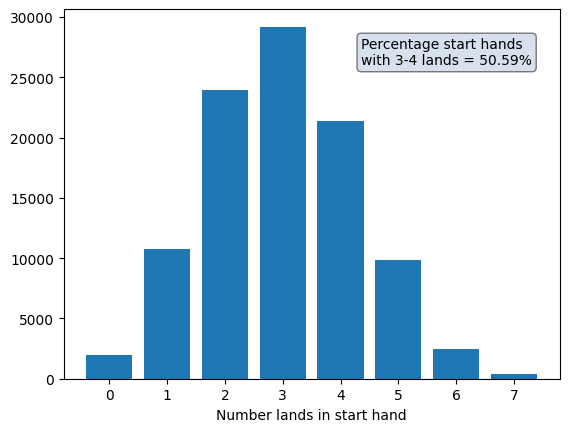

In [23]:
min_lands=3
max_lands=4
percentage_succesfull=100*percentage_within_values(test_list, min_lands, max_lands)


ax = plt.subplot()

ax.hist(test_list, bins=np.arange(9), rwidth=0.8, align='left')

props = dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.5)
ax.text(
    0.60, 
    0.85, 
    f'Percentage start hands\nwith {min_lands}-{max_lands} lands = {percentage_succesfull :.2f}%',
    transform=ax.transAxes,
    bbox=props
    )
ax.set_xlabel('Number lands in start hand')
plt.show()